##### Copyright 2023 Phillip Truppelli

In [1]:
# The purpose of this script is to showcase Grover's search algorithm applied to quantum natural language processing.
# This will provide a baseline framework for query answering on a quantum computer.
# You may obtain the source code and documentation here:
# 
# https://github.com/truppelli
# 
# This code is covered under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [98]:
# DisCoCat (Categorical Compositional Distributional) is a mathematical foundation that can be used to represent grammatical structure.
# Starting from the first example seen in the approach section of the corresponding paper
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

quantum = Word("quantum", n @ n.l)
computers = Word("computers", n)
_and = Word("and", (n @ n.r) @ n.l)
algorithms = Word("algorithms", n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [quantum, computers, _and, algorithms]))))

parsing = {"{} {} {}.".format(adj, obj1, obj2): adj @ obj1 @ obj2 >> grammar
            for adj in [quantum] for adj2 in [quantum] for obj in [algorithms]}
diagram = parsing['Phillip designs efficient quantum algorithms.']
sentences = list(parsing.keys())
print("Grammatical sentences:\n{}".format('\n'.join(sentences)))

from discopy.drawing import draw
print("Diagram for 'quantum computers and algorithms':")
draw(parsing['quantum computers and algorithms'], draw_type_labels=False, figsize=(17, 4))

Vocabulary:
Word('quantum', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('computers', grammar.pregroup.Ty(rigid.Ob('n')))
Word('and', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=1), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))


NameError: name 'obj1' is not defined

Vocabulary:
Word('Phillip', grammar.pregroup.Ty(rigid.Ob('n')))
Word('designs', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s'), rigid.Ob('n', z=-1)))
Word('efficient', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('quantum', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))


Diagram for 'Phillip designs efficient quantum algorithms':


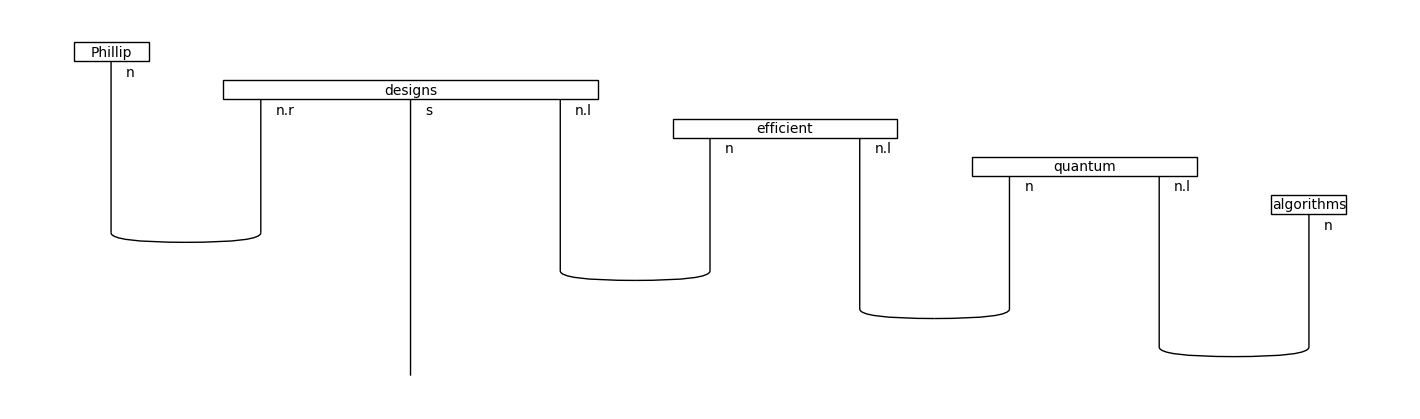

In [1]:
# DisCoCat (Categorical Compositional Distributional) is a mathematical foundation that can be used to represent grammatical structure.
# The following example showcases a sentence with a proper noun, a verb, and two adjectives that describe a single object.
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

Phillip = Word("Phillip", n)
designs = Word("designs", n.r @ s @ n.l)
efficient = Word("efficient", n @ n.l)
quantum = Word("quantum", n @ n.l)
algorithms = Word("algorithms", n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Phillip, designs, efficient, quantum, algorithms]))))

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n) @ Cup(n.l, n) @ Cup(n.l, n)

sentence = Phillip @ designs @ efficient @ quantum @ algorithms >> grammar
print("\n")
print("Diagram for 'Phillip designs efficient quantum algorithms':")
sentence.draw(figsize=(14, 4))

In [23]:
# Now we want to test out the parsing capabilities of DisCoPy
parsing = {"{} {} {} {} {}.".format(subj, verb, adj1, adj2, obj): subj @ verb @ adj1 @ adj2 @ obj >> grammar
            for subj in [Phillip] for verb in [designs] for adj1 in [efficient] for adj2 in [quantum] for obj in [algorithms]}
diagram = parsing['Phillip designs efficient quantum algorithms.']
sentences = list(parsing.keys())
print("Grammatical sentences:\n{}".format('\n'.join(sentences)))

Grammatical sentences:
Phillip designs efficient quantum algorithms.


In [100]:
# Next, we will create another example with a different sentence structure.
# If we rearrange the above sentence and make the adjective efficient apply to Phillip instead of algorithms, while reducing the total adjectives to just efficient, we can write:
# "Phillip who designs algorithms is efficient."
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

Phillip = Word("Phillip", n)
who = Word("who", n.r @ n @ s.l @ n)
designs = Word("designs", n.r @ s @ n.l)
algorithms = Word("algorithms", n)
is_efficient = Word("is efficient", n.r @ s)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Phillip, who, designs, algorithms, is_efficient]))))

vocab = [Phillip, who, designs, algorithms, is_efficient]

Vocabulary:
Word('Phillip', grammar.pregroup.Ty(rigid.Ob('n')))
Word('who', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('n'), rigid.Ob('s', z=-1), rigid.Ob('n')))
Word('designs', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s'), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))
Word('is efficient', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s')))


In [101]:
from time import time
from discopy.grammar.pregroup import brute_force

gen, n_sentences = brute_force(*vocab), 10
sentences, parsing = list(), dict()

print("Brute force search for grammatical sentences:")

start = time()
for i in range(n_sentences):
    diagram = next(gen)
    sentence = ' '.join(str(w)
        for w in diagram.boxes if isinstance(w, Word)) + '.'
    sentences.append(sentence)
    parsing.update({sentence: diagram})
    print(sentence)

print("\n{:.2f} seconds to generate {} sentences.".format(time() - start, n_sentences))

Brute force search for grammatical sentences:
Phillip is efficient.
algorithms is efficient.
Phillip designs Phillip.
Phillip designs algorithms.
algorithms designs Phillip.
algorithms designs algorithms.
Phillip who is efficient is efficient.
algorithms who is efficient is efficient.
Phillip who designs Phillip is efficient.
Phillip who designs algorithms is efficient.

2.73 seconds to generate 10 sentences.


Diagram for 'Phillip who designs algorithms is efficient.':


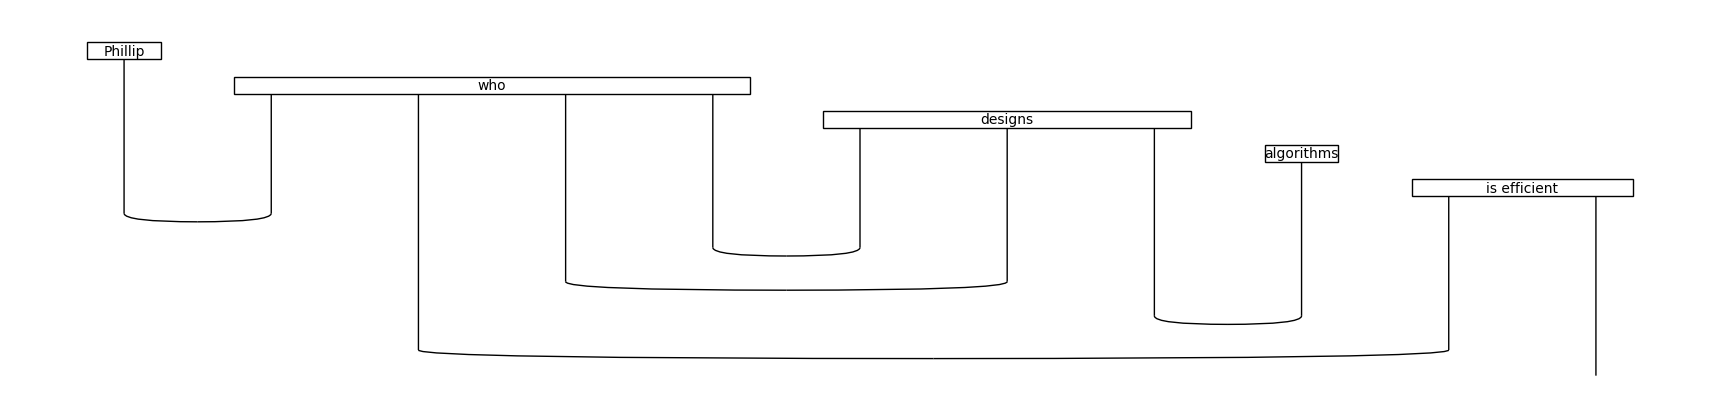

In [102]:
from discopy.drawing import draw
print("Diagram for 'Phillip who designs algorithms is efficient.':")
draw(parsing['Phillip who designs algorithms is efficient.'], draw_type_labels=False, figsize=(17, 4))

Circuit for the intransitive state where phase = π, used as ansatz for "Phillip" and "algorithms":


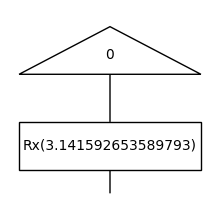

Circuit for the transitive state where phase = π, used as ansatz for "designs":


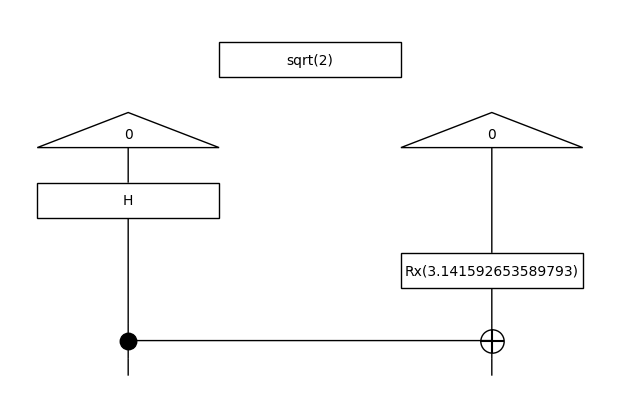

Circuit for the GHZ state, used as ansatz for "who":


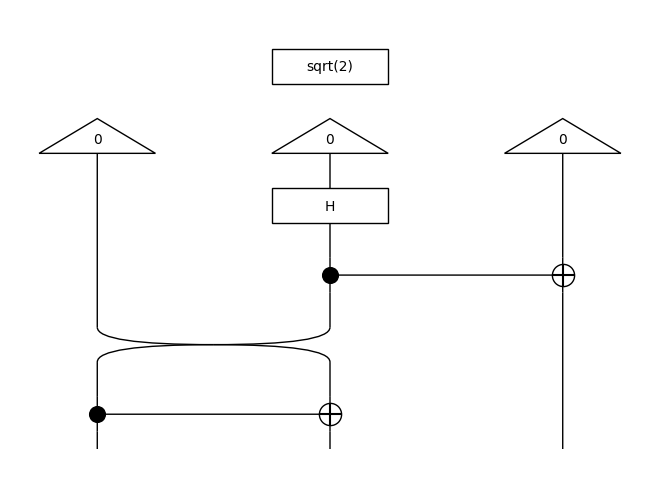

In [103]:
from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP
import math, unicodedata

# Ansatz for words with type `n`, e.g. 'Phillip', 'algorithms'
def intransitive_ansatz(phase):
    return Ket(0) >> Rx(phase)

# Ansatz for words with type `n.r @ s @ n.l`, e.g. 'designs'
def transitive_ansatz(phase):
    return sqrt(2) @ Ket(0, 0) >> H @ Rx(phase) >> CX

def who_ansatz():
    return sqrt(2) @ Ket(0, 0, 0)\
    >> Circuit.id(1) @ H @ Circuit.id(1)\
    >> Circuit.id(1) @ CX\
    >> (SWAP >>  CX) @ Circuit.id(1)

print("Circuit for the intransitive state where phase = " + unicodedata.lookup("GREEK SMALL LETTER PI") + ", used as ansatz for \"Phillip\" and \"algorithms\":")
intransitive_ansatz(math.pi).draw(aspect='auto', draw_type_labels=False, figsize=(2, 2))

print("Circuit for the transitive state where phase = " + unicodedata.lookup("GREEK SMALL LETTER PI") + ", used as ansatz for \"designs\":")
transitive_ansatz(math.pi).draw(aspect='auto', draw_type_labels=False, figsize=(6, 4))

print("Circuit for the GHZ state, used as ansatz for \"who\":")
who_ansatz().draw(aspect='auto', draw_type_labels=False)

In [110]:
import numpy as np
from discopy.quantum import qubit, Ket, CircuitFunctor
from discopy.grammar.pregroup import eager_parse

ob = {s: qubit ** 0, n: qubit ** 1}
ar = lambda params: {
    Phillip: Ket(0),
    who: who_ansatz(),
    designs: transitive_ansatz(params['designs']),
    algorithms: Ket(1),
    is_efficient: intransitive_ansatz(params['is_efficient'])}

# 'designs': 0.5 and 'is_efficient': 1.0

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'designs': 0.5, 'is_efficient': 1.0}

#parsing = {"{} {} {} {} {}.".format(subj, verb, adj1, adj2, obj): subj @ verb @ adj1 @ adj2 @ obj >> grammar
#            for subj in [Phillip] for verb in [designs] for adj1 in [efficient] for adj2 in [quantum] for obj in [algorithms]}

parsed_sentence = {"{Phillip} {who} {designs} {algorithms} {is_efficient}"}

circuit = F(params0)(parsed_sentence)

#F.draw(aspect='auto', draw_type_labels=False, figsize=(5, 5))

#F0 = F(params0)

#def draw_functor(d0, d1):
#    return (d0 @ Box('-->', Ty(), Ty()) @ d1).interchange(1, 2, left=True).draw(aspect='auto')

print("Circuit for 'Phillip who designs algorithms is efficient.':")
#phrase = eager_parse(Phillip, who, designs, algorithms, is_efficient, target=n)
#draw(phrase)

#parsing = {"{} {} {} {} {}.".format(subj, verb, adj1, adj2, obj): subj @ verb @ adj1 @ adj2 @ obj >> grammar
#            for subj in [Phillip] for verb in [designs] for adj1 in [efficient] for adj2 in [quantum] for obj in [algorithms]}
#diagram = parsing['Phillip designs efficient quantum algorithms.']
#sentences = list(parsing.keys())
#print("Grammatical sentences:\n{}".format('\n'.join(sentences)))
#circuit = F(params0)(parsing['Phillip who designs algorithms is efficient.'])
#circuit.draw(figsize=(10, 8), aspect='auto', draw_type_labels=False)

TypeError: Expected cat.Arrow, got set instead.

In [ ]:
from pytket.extensions.qiskit import tk_to_qiskit

tk_circ = circuit.to_tk()
print("{}:\n{}\n".format(tk_circ, '\n'.join(map(str, tk_circ))))
print("post selection:\n{}\n".format(tk_circ.post_selection))
print("scalar:\n{}\n".format(tk_circ.scalar))
print("qiskit circuit:")
tk_to_qiskit(tk_circ).draw()

In [ ]:
# Now that we have shown another example of sentence structure symbolization using DisCoCat
#
# Walter and Jesse are coworkers.
# Gus is the boss of Walter.
# Gus hates Walter.
# Gus likes Jesse.
# Gus wants Walter gone.
# Walter knows Hector.
# Hector hates Gus.
# Walter talks to Hector.
# Hector blows up Gus.
#

In [71]:
from discopy.quantum import Ket, H, Rx, CX, sqrt

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

print(verb_ansatz(0).eval())

Tensor[complex]([1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], dom=Dim(1), cod=Dim(2, 2))


In [ ]:
.25 * (verb_ansatz(0) >> verb_ansatz(0).dagger()).measure()

In [ ]:
from discopy import CircuitFunctor, qubit

ob = {s: 0, n: 1}
ar = lambda params: {
    Phillip: Ket(0), algorithms: Ket(1),
    designs: verb_ansatz(params['designs'])}
    

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'loves': 0.5}

print("Circuit for 'Alice loves Bob':")
F(params0)(parsing['Alice loves Bob.']).draw(
    aspect='auto', draw_type_labels=False, figsize=(5, 5))

In [83]:
from discopy.cat import Category
from discopy.tensor import Tensor
from discopy import tensor

F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={Phillip: [0, 1], designs: [0, 1, 0, 0], algorithms: [1, 0]},
    dom=Category(Ty, Diagram))

print(F(Phillip @ designs @ algorithms)) # need to add adjectives now
print(F(grammar))

assert F(Phillip @ designs @ algorithms >> grammar).array == 1

Tensor[int]([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dom=Dim(1), cod=Dim(2, 2, 2, 2))
Tensor[int]([1, 0, 0, ..., 0, 0, 1], dom=Dim(2, 2, 2, 2, 2, 2, 2, 2), cod=Dim(1))


AxiomError: n @ n.r @ s @ n.l @ algorithms does not compose with Cup(n, n.r) @ s @ n.l @ n @ n.l @ n @ n.l @ n: n @ n.r @ s @ n.l @ n != n @ n.r @ s @ n.l @ n @ n.l @ n @ n.l @ n.

In [3]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

In [6]:
# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit that applies a square root of NOT gate, then measures the qubit.
circuit = cirq.Circuit(cirq.X(qubit) ** 0.5, cirq.measure(qubit, key='m'))
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=01001110100010010000
